In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer

In [5]:
master_df = pd.read_csv('track_master_df.csv') #need to reference all features
    
# Use only the numerical data, remove duration_ms due to possible leak
features = df.columns[4:]
df_num = df[features].copy().drop(columns = ['duration_ms', 'tempo'])

   

replace = [('time_signature', list(range(0,6))),
           ('mode', [0,1]),
           ('key', list(range(-1,12)))]
    
for col in replace:
    cat_dtype = pd.api.types.CategoricalDtype(categories=col[1], ordered=False) # makes sure every
    df_num[col[0]] = master_df[col[0]].astype(cat_dtype)

    df_num = pd.concat([df_num,pd.get_dummies(df_num[col[0]], prefix=col[0])],axis=1)
    df_num = df_num.drop(columns = col[0])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


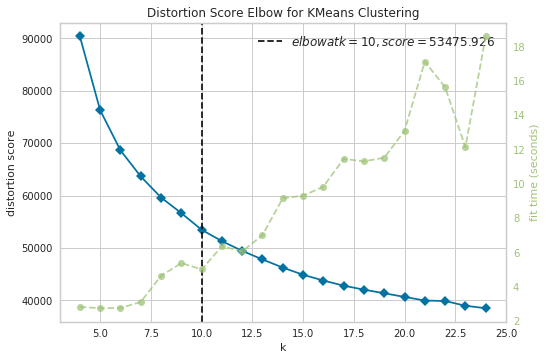

In [7]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4, 25))

visualizer.fit(df_num)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [8]:
# Fit model
kmeans = KMeans(n_clusters=10)
kmeans.fit(df_num)

# Create labels
labels = kmeans.labels_

# Append cluster labels to dataframe
new_series = pd.Series(labels)
df_num['clusters'] = new_series.values

In [9]:
df_num.to_csv('cluster_master.csv', index = False)

In [16]:
# Calculate each cluster's centroid
# centroids = df_num.groupby('clusters').mean()
# print(centroids)

# Specify X, y
X = df_num.drop(columns=['clusters'])
y = df_num['clusters']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.33, random_state=42)

# Train, val split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.33, random_state=42)